# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기


### EDA?


데이터 그 자체만으로부터 인사이트를 얻어내는 접근법이다. 시각화, 통계적 수치, numpy/pandas의 컨테이너들 등이 전부 사용될 수 있다.

### EDA의 Process

1. 분석의 목적과 변수(DataFrame의 column) 확인
2. 데이터 전체적으로 살펴보기 : 데이터간의 상관관계, N/A(결측치), 데이터의 사이즈 등을 파악하는 과정
3. 데이터의 개별 속성 파악하기

### EDA with Example - Titanic

1. 분석의 목적 : 살아남은 사람들은 어떤 특징을 가지고 있었을까?
2. 변수 확인 : survival, pclass, sex, age 등의 variables(column)이 있음

## 0. 라이브러리 준비

In [2]:
# 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# 동일 경로에 "train.csv"가 있다면:
# 데이터 불러오기

titanic_df = pd.read_csv("./train.csv")

## 1. 분석의 목적과 변수 확인

- 타이타닉 호에서 생존한 생존자들은 어떤 사람들일까?

In [4]:
# 상위 5개 데이터 확인하기

titanic_df.head(5)

# Cabin column에서 NaN이라는 결측치 발견! 이 결측치는 그 자체만으로 정보가 되거나 매꿔줘야 하는 상황이 생길 수 있음.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 각 Column의 데이터 타입 확인하기

titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기

In [6]:
# 데이터 전체 정보를 얻는 함수 : .describe()

titanic_df.describe()

# describe함수는 수치형 데이터에 대한 요약만을 제공하기때문에 데이터타입이 object였던 column 정보는 여기서 확인 불가.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# 상관계수 확인하기

titanic_df.corr()
# Correlation is NOT Causation

# 상관성 : A up, B up, ...
# 인과성 : A -> B

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
# 결측치 확인

titanic_df.isnull().sum()
# Age, Cabin, Embarked에서 결측치 발견.

# 결측치를 어떻게 처리할 것인가도 매우 중요한 결정이 될 수 있다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

### 1. Survived Column

In [9]:
# 생존자, 사망자 명수는?

titanic_df['Survived'].sum() # 생존자 명수

342

In [31]:
titanic_df[titanic_df['Survived']==1].count()

PassengerId    342
Survived       342
Pclass         342
Name           342
Sex            342
Age            290
SibSp          342
Parch          342
Ticket         342
Fare           342
Cabin          136
Embarked       340
dtype: int64

In [11]:
titanic_df['Survived'].value_counts() # 각 value별로 몇 번 등장했는 지 세주는 함수

0    549
1    342
Name: Survived, dtype: int64

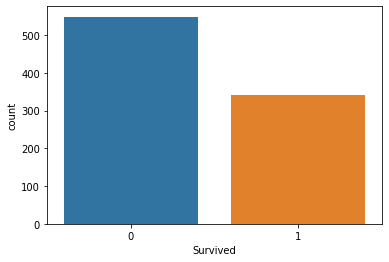

In [12]:
# 생존자 수와 사망자 수를 Barplot으로 그려보기
# sns.countplot() 사용

sns.countplot(x='Survived', data=titanic_df)
plt.show()

### 2. Pclass

In [13]:
# Pclass에 따른 인원 파악

titanic_df[['Pclass', 'Survived']]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [14]:
# 위 데이터를 Pclass기준으로 Groupby

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).count() # 각 클래스 별로 몇 명이 속해있는 지 확인

,Survived
Pclass,
1,216
2,184
3,491


In [15]:
# 각 클래스 별 생존자 인원은?

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [16]:
# 그렇다면 각 클래스별로 전체 인원 대비 생존자 비율은?

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()
# Pclass 등급이 높을 수록 생존율이 높다는 것을 확인할 수 있다.

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


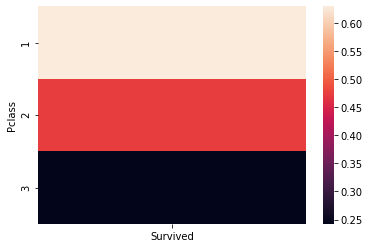

In [17]:
# 히트맵 활용해 위의 결과를 시각적으로 확인

sns.heatmap(titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean())
plt.show()

In [36]:
titanic_df[['Cabin', 'Survived']].groupby(['Survived']).count()

,Cabin
Survived,
0,68
1,136


In [40]:
titanic_df[titanic_df['Cabin']==np.nan].count()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 3. Sex

In [18]:
# 성별 별로 생존자가 몇 명인지 확인
titanic_df[['Sex', 'Survived']].groupby(['Sex']).count()

,Survived
Sex,
female,314
male,577


In [19]:
# 성별 별로 생존자가 몇 명인지 확인
titanic_df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

In [20]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

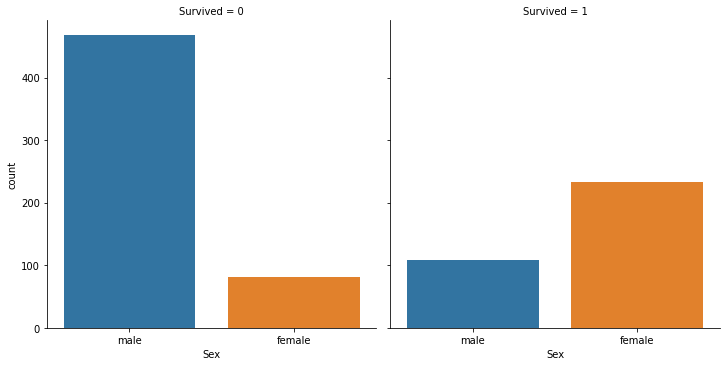

In [21]:
# sns.catplot

sns.catplot(x='Sex', col='Survived', kind='count', data=titanic_df)
plt.show()
# 이것으로부터 얻을 수 있는 insight : 살아남지 못 한 남성이 살아남지 못 한 여성보다 훨씬 많고 살아남은 사람은 반대이다.

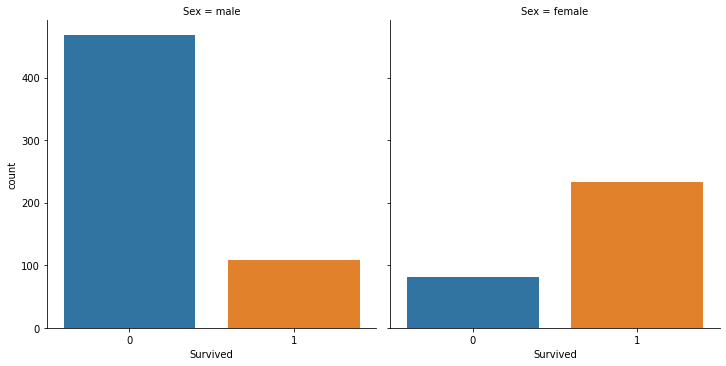

In [22]:
sns.catplot(x='Survived', col='Sex', kind='count', data=titanic_df)
plt.show()

### 4. Age

**Remind : 결측치 존재**

In [23]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [24]:
titanic_df[titanic_df.Survived == 1]['Age']

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

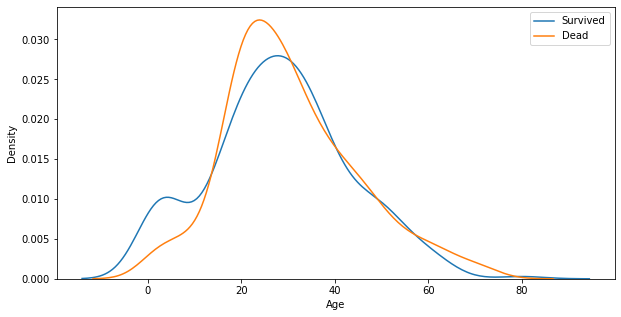

In [25]:
# Survived 1, 0과 Age의 경향성

# figure -> axis -> plot

fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.kdeplot(x=titanic_df[titanic_df.Survived == 1]['Age'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived == 0]['Age'], ax=ax)

plt.legend(['Survived', 'Dead'])

plt.show()

### Appendix 1. Sex + Pclass vs Survived

**복합적인 요소에 대한 분석을 시각화할 때는 `sns.catplot()`을 많이 이용**

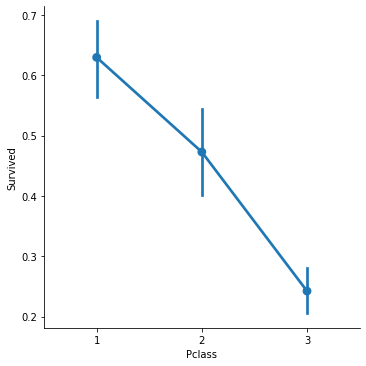

In [26]:
sns.catplot(x='Pclass', y='Survived', kind='point', data=titanic_df)
plt.show()

# point 그래프에서 각 점은 추정치를 의미
# 점에 있는 막대기는 신뢰구간을 의미

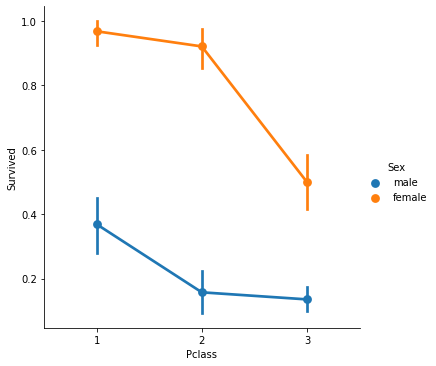

In [27]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=titanic_df)
plt.show()

### Appendix 2. Age + Pclass

In [28]:
# Age graph with Pclass

titanic_df['Age'][titanic_df.Pclass == 1]

1      38.0
3      35.0
6      54.0
11     58.0
23     28.0
       ... 
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: Age, Length: 216, dtype: float64

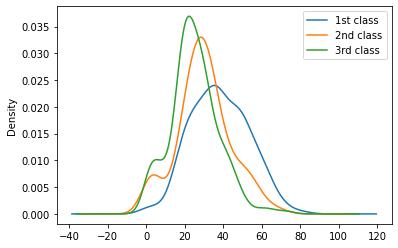

In [29]:
titanic_df['Age'][titanic_df.Pclass == 1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind='kde')

plt.legend(['1st class', '2nd class', '3rd class'])

plt.show()

# 클래스가 높아질수록 나이대도 높아지는 것을 알 수 있다.

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

# 1. 타이타닉 데이터에서 유의미한 Feature 찾아보기

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [42]:
titanic_df = pd.read_csv("./train.csv")

In [43]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

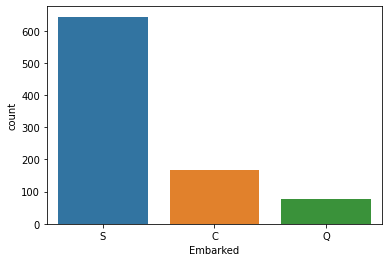

In [69]:
# 항구별 탑승객 수
sns.countplot(x=titanic_df['Embarked'])
plt.show()

항구별로 탑승객 수가 꽤 차이가 나는 것을 알 수 있다. 각 항구별로 생존률은 어떨 지 알아보자.

In [68]:
titanic_df[['Embarked', 'Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


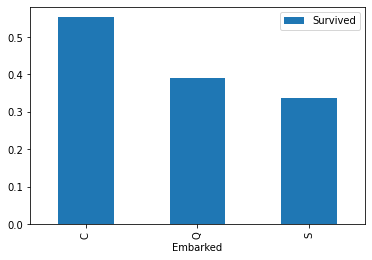

In [73]:
# 항구 별 생존률 그래프
titanic_df[['Embarked', 'Survived']].groupby('Embarked').mean().plot(kind='bar')
plt.show()

각 항구별로 생존률이 어느 정도 의미있는 차이를 보이는 것 같다. 유난히 C 항구에서 생존률이 높은 것을 볼 수 있는데 각 항구별로 Sex, Pclass, Age 가 어떤 분포를 가지는 지 확인하자.

In [123]:
# sns.catplot(x='Embarked', col='Sex', kind='count', data=titanic_df[['Embarked','Sex']])
# plt.show()

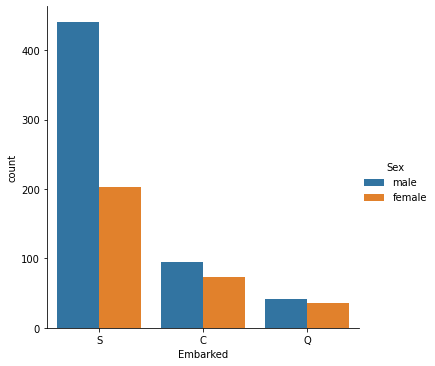

In [85]:
# 항구 별 성별 분포 그래프
sns.catplot(x='Embarked', hue='Sex', kind='count', data=titanic_df[['Embarked','Sex']])
plt.show()

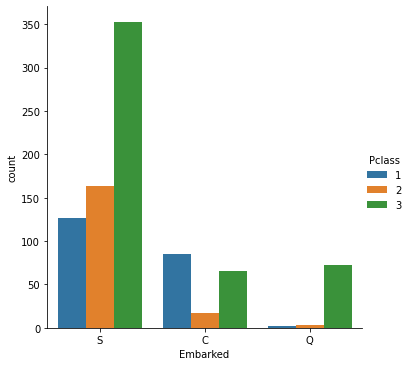

In [87]:
# 항구 별 pclass분포 그래프
sns.catplot(x='Embarked', hue='Pclass', kind='count', data=titanic_df)
plt.show()

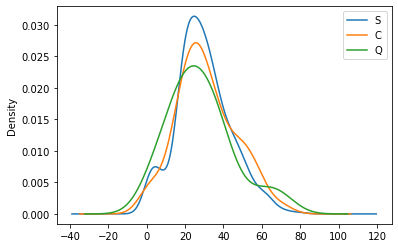

In [94]:
# 항구 별 나이 그래프
titanic_df['Age'][titanic_df.Embarked == 'S'].plot(kind='kde')
titanic_df['Age'][titanic_df.Embarked == 'C'].plot(kind='kde')
titanic_df['Age'][titanic_df.Embarked == 'Q'].plot(kind='kde')

plt.legend(['S', 'C', 'Q'])

plt.show()

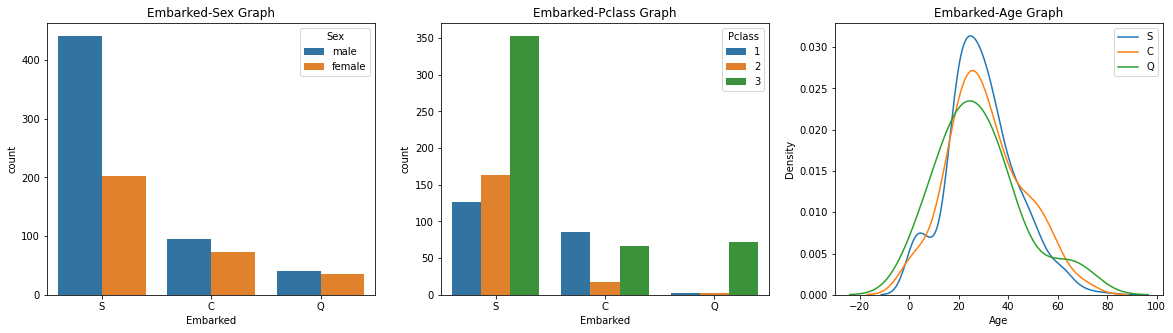

In [132]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))

sns.countplot(x='Embarked', hue='Sex', data=titanic_df[['Embarked','Sex']], ax=ax[0])
ax[0].set_title("Embarked-Sex Graph")

sns.countplot(x='Embarked', hue='Pclass', data=titanic_df, ax=ax[1])
ax[1].set_title("Embarked-Pclass Graph")

sns.kdeplot(titanic_df['Age'][titanic_df.Embarked == 'S'], ax=ax[2])
sns.kdeplot(titanic_df['Age'][titanic_df.Embarked == 'C'], ax=ax[2])
sns.kdeplot(titanic_df['Age'][titanic_df.Embarked == 'Q'], ax=ax[2])
ax[2].legend(['S', 'C', 'Q'])
ax[2].set_title("Embarked-Age Graph")

plt.show()

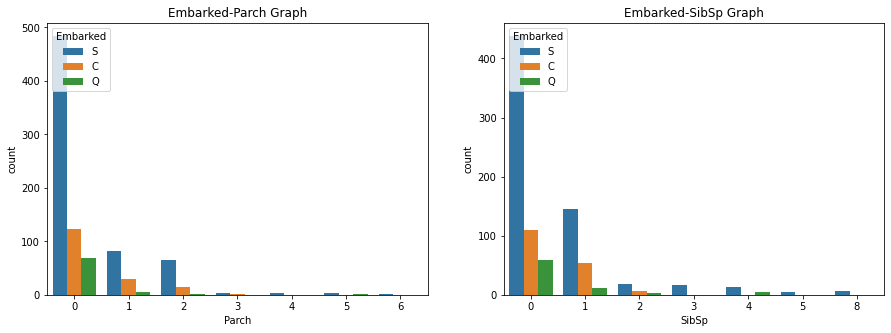

In [137]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

sns.countplot(x='Parch', hue='Embarked', data=titanic_df, ax=ax[0])
ax[0].set_title("Embarked-Parch Graph")

sns.countplot(x='SibSp', hue='Embarked', data=titanic_df, ax=ax[1])
ax[1].set_title("Embarked-SibSp Graph")
plt.show()

- 각 항구 별 Sex는 S항구에서 유난히 남자가 많았고, 나머지 항구는 여전히 남자 승객이 많긴 하지만 큰 차이는 없다.  
- 각 항구 별 Pclass는 S항구에서는 3등급부터 1등급 순으로 많고 Q 항구에서는 3등급만 많은데 눈에 띄는 항구가 C항구이다. C항구에서는 유난히 1등급 승객이 많이 탑승했다.  
- 각 항구별 Age 분포는 세 항구 보두 20-40대가 가장 많은 분포를 보이며 큰 특이점은 없어보인다.
- 각 항구별 Parch, SibSp는 단순히 탑승객이 많은 S, C, Q 항구 순서로 가족 구성원수에 비례하는 그래프를 보여 특이점이 없어보인다.

Embarked-Pclass 그래프에서 나온 의문을 조금 더 보기 위해 Embarked-Fare그래프까지 그려보자

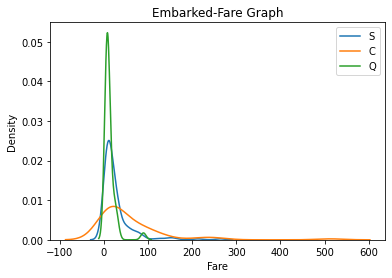

In [169]:
sns.kdeplot(titanic_df['Fare'][titanic_df.Embarked == 'S'])
sns.kdeplot(titanic_df['Fare'][titanic_df.Embarked == 'C'])
sns.kdeplot(titanic_df['Fare'][titanic_df.Embarked == 'Q'])
plt.legend(['S', 'C', 'Q'])
plt.title("Embarked-Fare Graph")

plt.show()

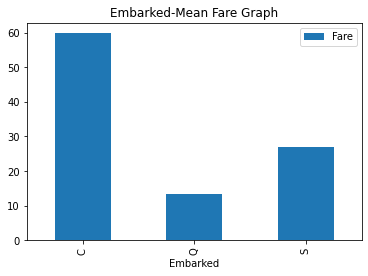

In [170]:
titanic_df[['Embarked', 'Fare']].groupby('Embarked').mean().plot(kind='bar')
plt.title('Embarked-Mean Fare Graph')
plt.show()

역시 위의 그래프에서 보면 C항구에서 탑승한 탑승객의 평균 지불 요금이 가장 비싸다는 것을 다시 확인할 수 있다. 따라서 수업에서 다뤘던 Pclass와 Survived 사이의 관계 때문에 C항구에서의 생존율이 다른 항구에서보다 높다는 것을 알아낼 수 있다.

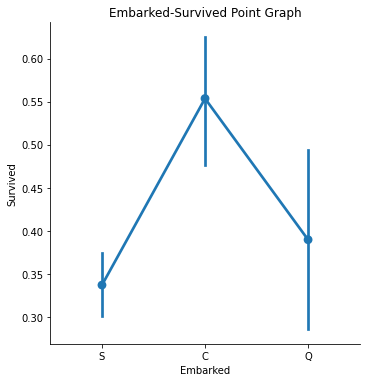

In [178]:
sns.catplot(x='Embarked', y='Survived', kind='point', data=titanic_df)
plt.title('Embarked-Survived Point Graph')

plt.show()

### 결론
C항구에서 비싼 요금을 지불하고 높은 등급의 탑승권을 가진 탑승객이 많았는데 아무래도 C항구가 부자동네에 위치한 항구였나보다.. 결국 C항구에서 탑승 한 사람들이 살아남았을 확률이 더 높은 것을 볼 수 있다.

**무대뽀로 하기 힘들다면? 다음 Hint와 함께 시도해봅시다 :**

1. 데이터를 톺아봅시다.  
  - 각 데이터는 어떤 자료형을 가지고 있나요?
  - 데이터에 **결측치**는 없나요? -> 있다면 이를 어떻게 메꿔줄까요?
  - 데이터의 자료형을 바꿔줄 필요가 있나요? -> 범주형의 One-hot encoding (예를 들어 성별을 0, 1로 바꿔준다는 식)
2. 데이터에 대한 가설을 세워봅시다.  
  - 가설은 개인의 경험에 의해서 도출되어도 상관이 없습니다.
  - 가설은 명확할 수록 좋습니다. ex) Titanic Data에서 Survival 여부와 성별에는 상관관계가 있다.
3. 가설을 검증하기 위한 증거를 찾아봅시다.  
  - 이 증거는 한 눈에 보이지 않을 수 있습니다. 우리가 다룬 여러 Technique를 써줘야합니다.
  - `.groupby()`를 통해서 그룹화된 정보에 통계량을 도입하면 어떨까요?
  - `.merge()`를 통해서 두개 이상의 DataFrame을 합치면 어떨까요?
  - 시각화를 통해 일목요연하게 보여주면 더욱 좋겠죠?